In [1]:
# Import all required modules
# Disable warnings
import warnings

import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")

# Import plotting modules
import seaborn as sns

sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker

%config InlineBackend.figure_format = 'retina'

In [2]:
# Tune the visual settings for figures in `seaborn`
sns.set_context(
    "notebook", font_scale=1.5, rc={"figure.figsize": (11, 8), "axes.titlesize": 18}
)

from matplotlib import rcParams

rcParams["figure.figsize"] = 11, 8

In [3]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

In [4]:
df = pd.read_csv(DATA_PATH + "mlbootcamp5_train.csv", sep=";")
print("Dataset size: ", df.shape)
df.head()

Dataset size:  (70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


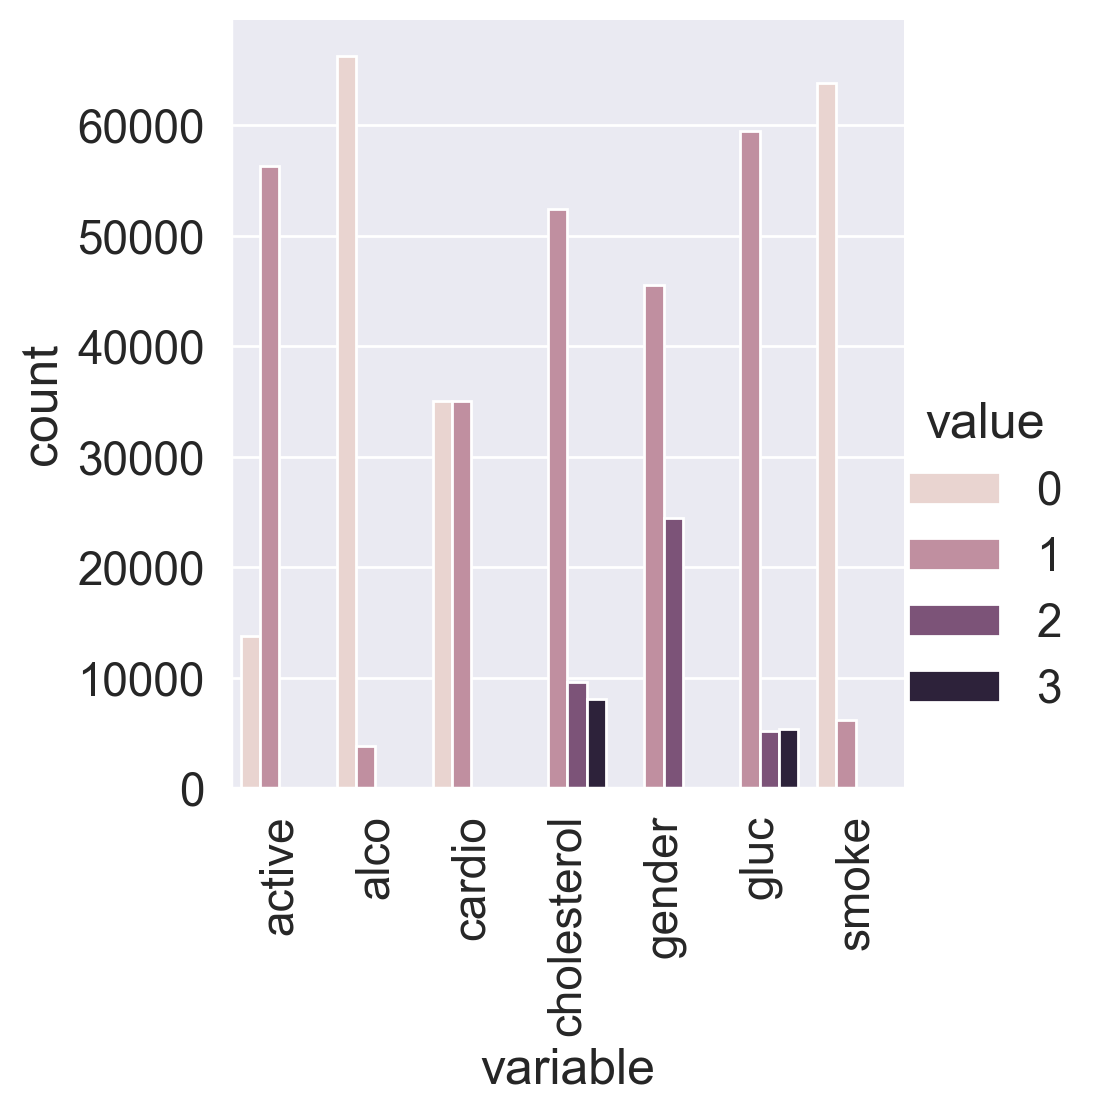

In [5]:
df_uniques = pd.melt(
    frame=df,
    value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active", "cardio"],
)
df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable", "value"])["value"].count())
    .sort_index(level=[0, 1])
    .rename(columns={"value": "count"})
    .reset_index()
)

sns.catplot(
    x="variable", y="count", hue="value", data=df_uniques, kind="bar"
)
plt.xticks(rotation='vertical');

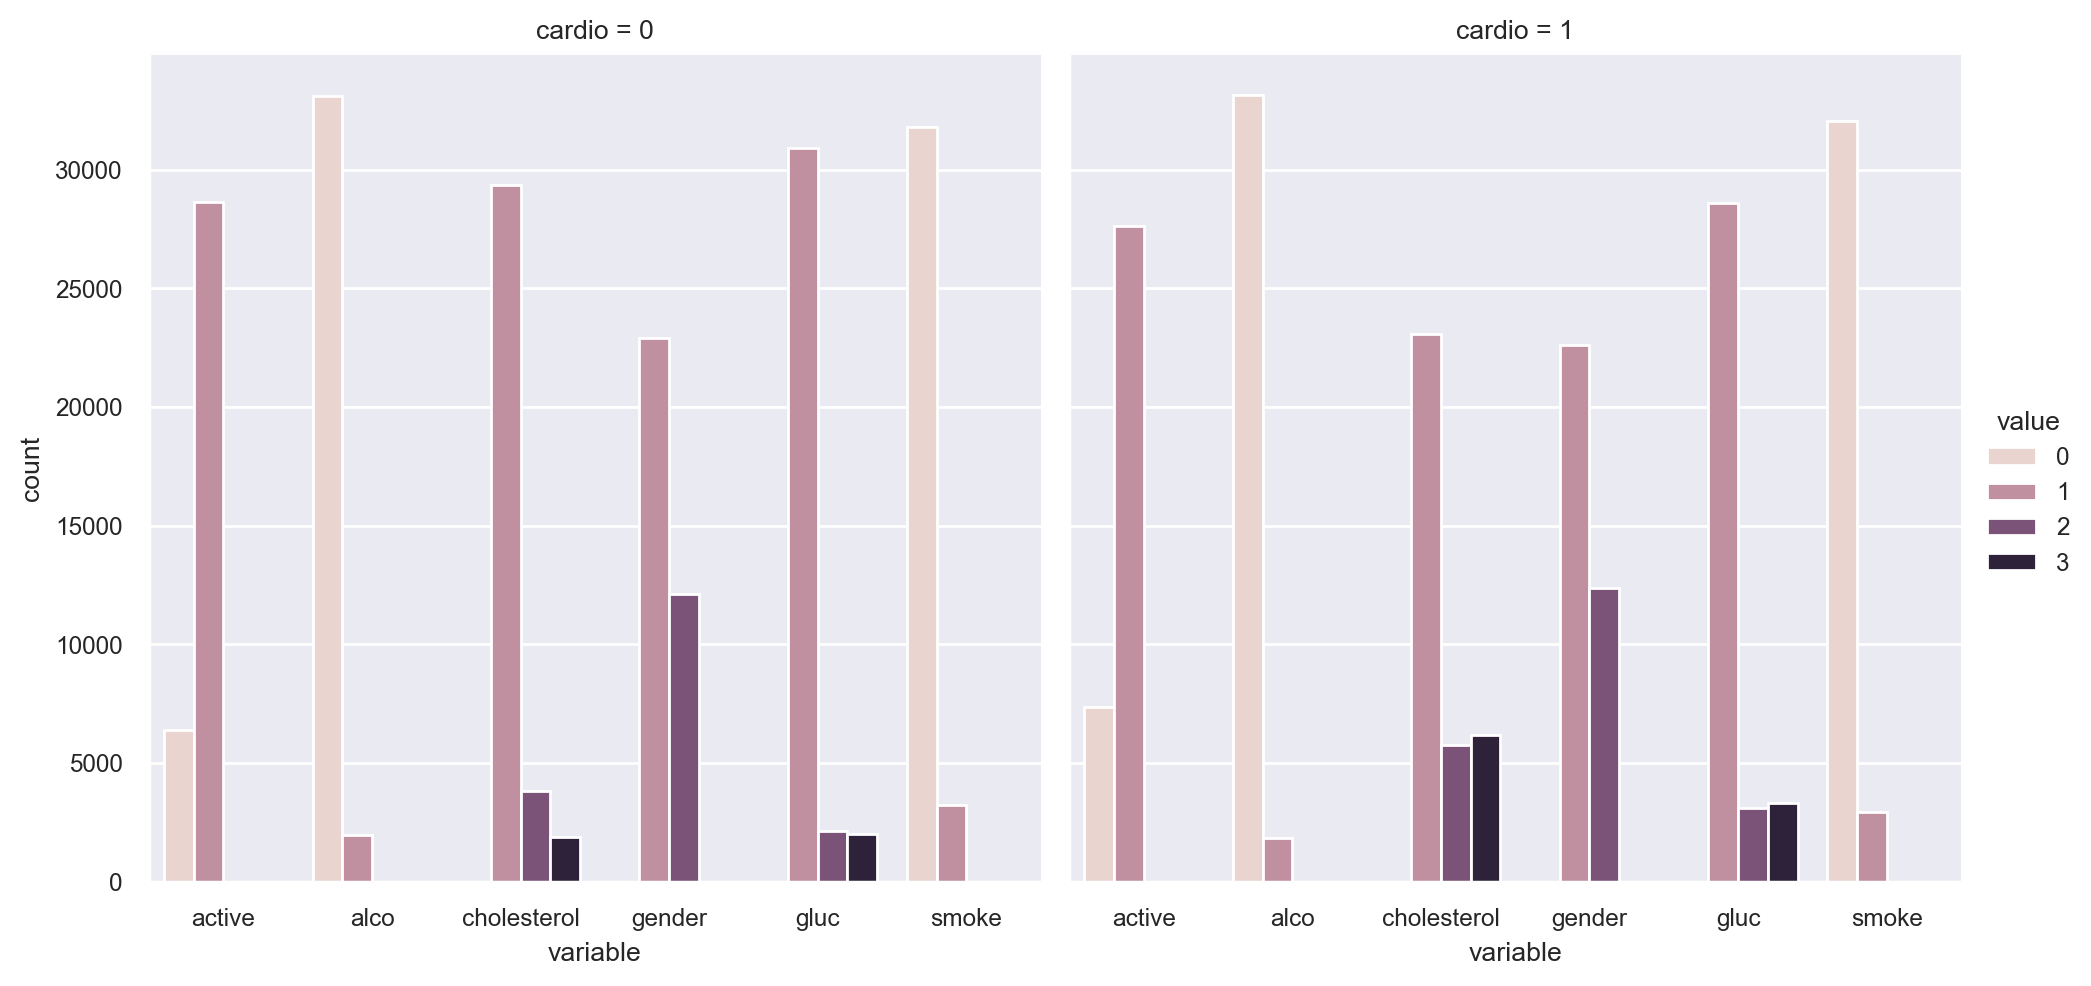

In [89]:
df_uniques = pd.melt(
    frame=df,
    value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active"],
    id_vars=["cardio"],
)
df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable", "value", "cardio"])["value"].count())
    .sort_index(level=[0, 1])
    .rename(columns={"value": "count"})
    .reset_index()
)
sns.set(font_scale=0.8)
sns.catplot(
    x="variable",
    y="count",
    hue="value",
    col="cardio",
    data=df_uniques,
    kind="bar",
)


In [7]:
for c in df.columns:
    n = df[c].nunique()
    print(c)
    if n <= 3:
        print(n, sorted(df[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * "-")

id
70000
----------
age
8076
----------
gender
2 [(1, 45530), (2, 24470)]
----------
height
109
----------
weight
287
----------
ap_hi
153
----------
ap_lo
157
----------
cholesterol
3 [(1, 52385), (2, 9549), (3, 8066)]
----------
gluc
3 [(1, 59479), (2, 5190), (3, 5331)]
----------
smoke
2 [(0, 63831), (1, 6169)]
----------
alco
2 [(0, 66236), (1, 3764)]
----------
active
2 [(0, 13739), (1, 56261)]
----------
cardio
2 [(0, 35021), (1, 34979)]
----------


In [10]:
#1.1
df["gender"].value_counts()

gender
1    45530
2    24470
Name: count, dtype: int64

In [12]:
df.groupby("gender")["height"].mean()

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

In [16]:
#1.2
df.groupby(["gender","alco"]).mean()

id           age      height     weight       ap_hi  \
gender alco                                                                  
1      0     49903.945097  19517.351281  161.366900  72.455023  128.124930   
       1     49684.341085  19233.947459  160.924203  76.791645  128.686477   
2      0     50086.151553  19423.439063  169.871039  77.060241  130.065487   
       1     50312.661160  19128.810219  170.593546  78.912793  130.191318   

                  ap_lo  cholesterol      gluc     smoke    active    cardio  
gender alco                                                                   
1      0      94.312087     1.379657  1.233384  0.014717  0.801167  0.496676  
       1     102.574505     1.578811  1.298880  0.137812  0.834625  0.498708  
2      0      99.891663     1.323364  1.207756  0.167467  0.801619  0.508483  
       1     106.099116     1.419900  1.233192  0.650788  0.851325  0.477910

In [30]:
#1.3
round(100*(df.loc[df["gender"] == 2,"smoke"].mean() - df.loc[df["gender"] == 1,"smoke"].mean()))

20

In [39]:
#1.4
round((
    df[df["smoke"] == 0]["age"].median() - df[df["smoke"] == 1]["age"].median()
) / 365 * 12)
    

20

In [43]:
#1.5
df["age_years"] = round((df["age"] / 365))
df["age_years"].max()

65.0

In [45]:
smoking_olds = (df[
    (df["gender"] == 2) &           
    (df["age_years"] > 60) &
    (df["age_years"] <=64) &
    (df["smoke"] == 1)
    ])

In [48]:
smoking_olds[(smoking_olds["cholesterol"] == 1) & (smoking_olds["ap_hi"] < 120)]["cardio"].mean()

0.2631578947368421

In [49]:
smoking_olds[(smoking_olds["cholesterol"] == 3) & (smoking_olds["ap_hi"] >160) & (smoking_olds["ap_hi"] <=180)]["cardio"].mean()

1.0

In [50]:
#1.6
df["BMI"] = df["weight"] / (df["height"] / 100) ** 2

In [54]:
df.groupby("gender")["BMI"].median()

gender
1    26.709402
2    25.910684
Name: BMI, dtype: float64

In [56]:
df.groupby(["gender", "alco" , "cardio"])["BMI"].median()

gender  alco  cardio
1       0     0         25.654372
              1         27.885187
        1     0         27.885187
              1         30.110991
2       0     0         25.102391
              1         26.674874
        1     0         25.351541
              1         27.530797
Name: BMI, dtype: float64

In [ ]:
#1.7

In [64]:
df_remove = df[
    (df["ap_lo"] > df["ap_hi"]) |
    (df["height"] < df["height"].quantile(0.025)) |
    (df["height"] > df["height"].quantile(0.975)) |
    (df["weight"] < df["weight"].quantile(0.025)) |
    (df["weight"] > df["weight"].quantile(0.975))]
filtred_df = df[~df.index.isin(df_remove)]
df_remove.shape[0] / df.shape[0]

0.0963

<Axes: >

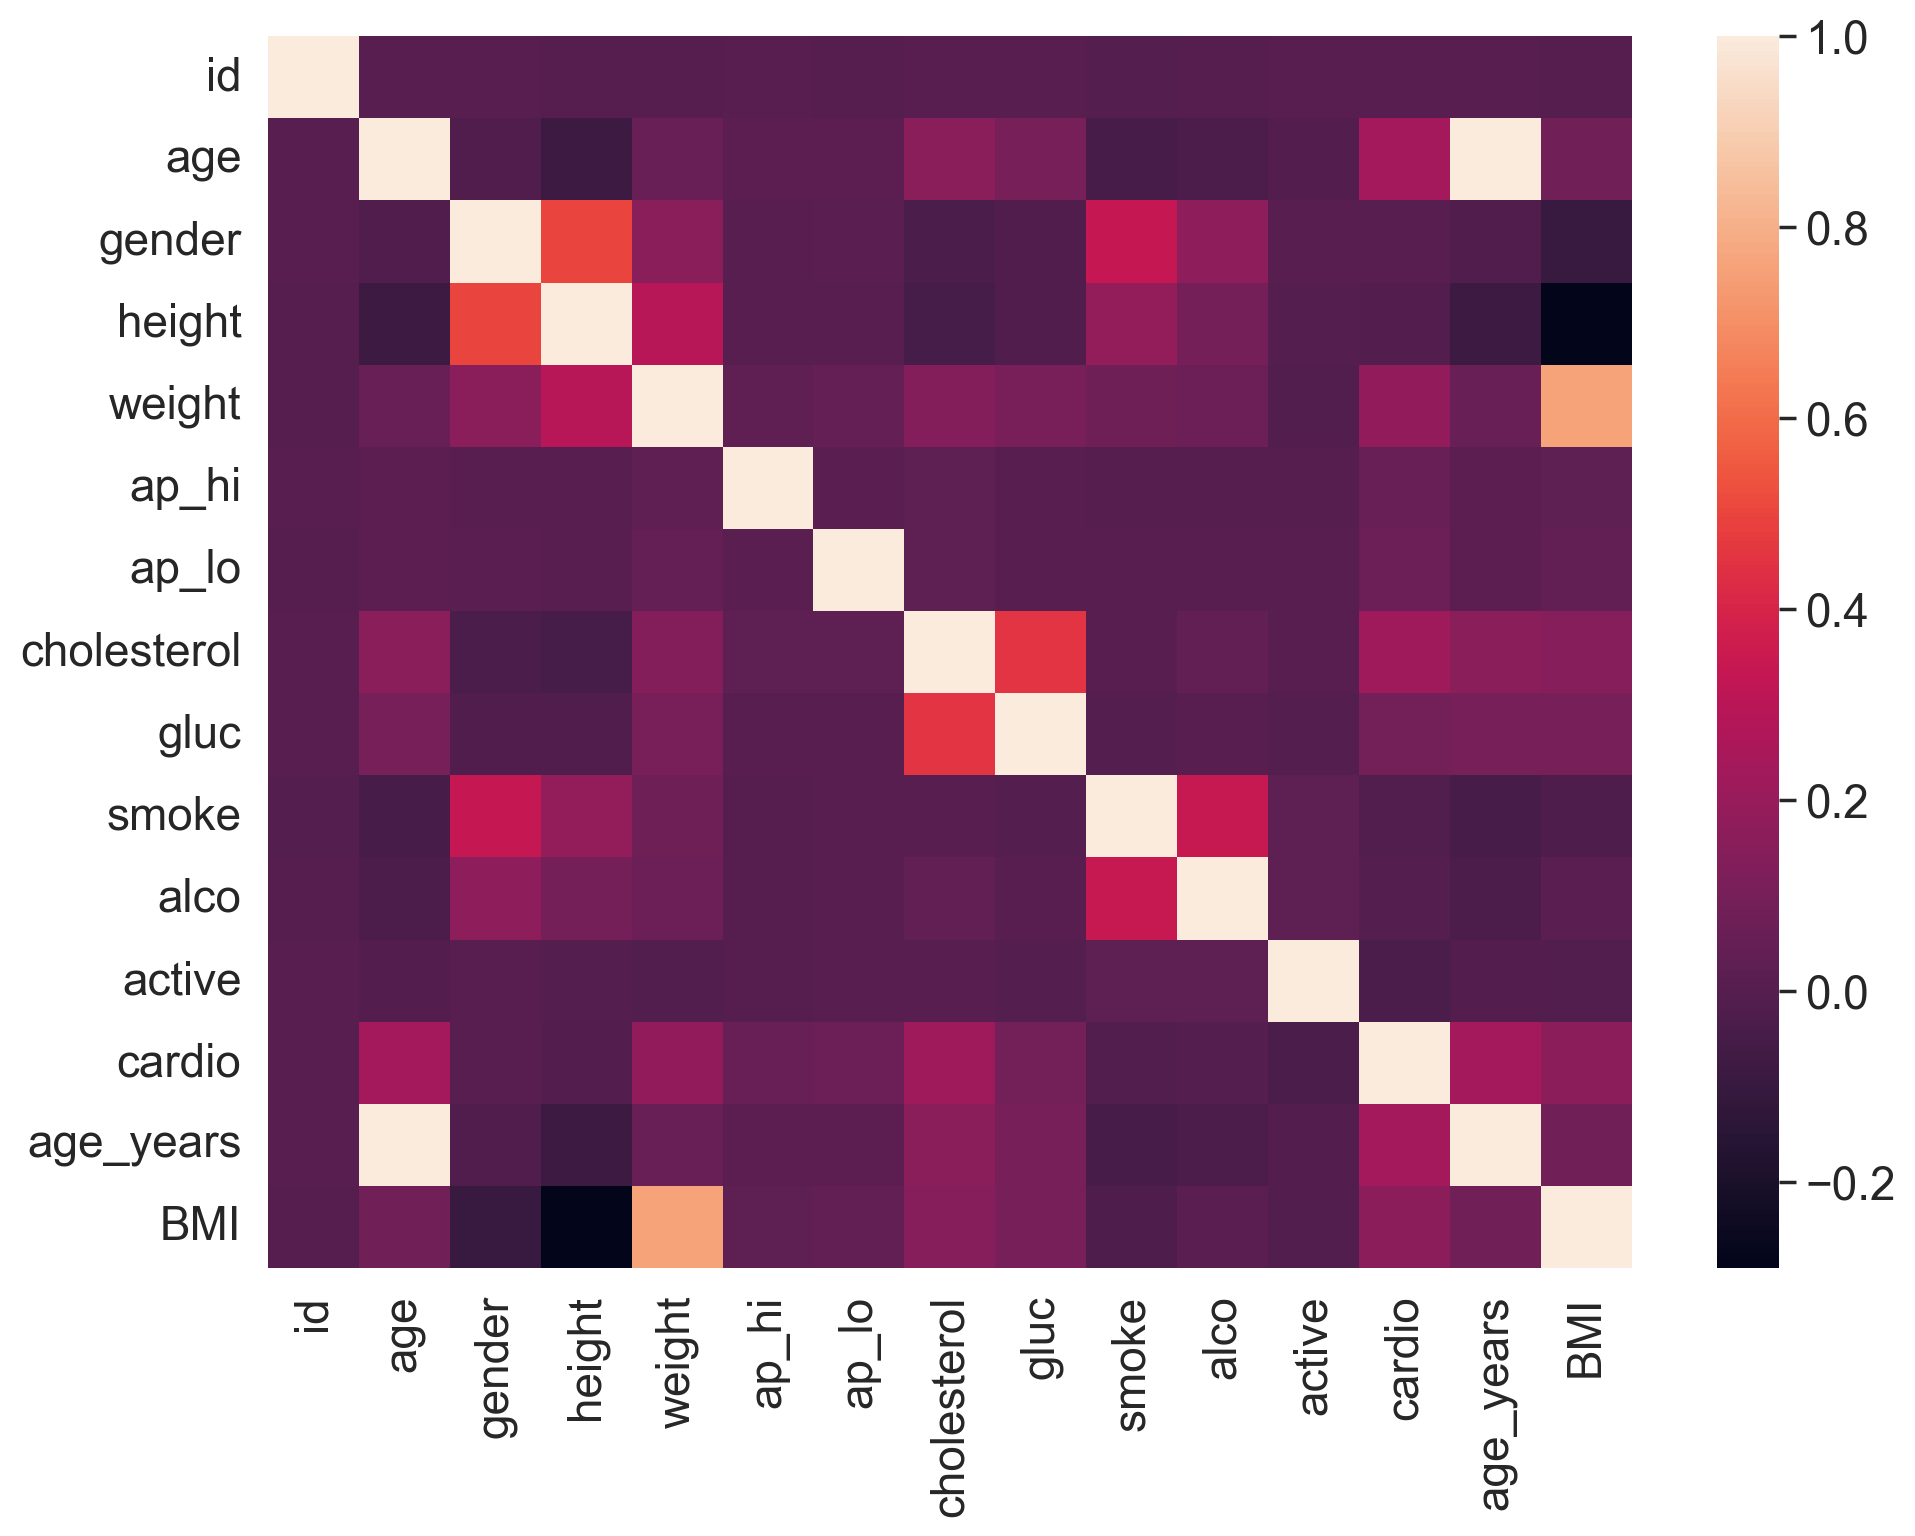

In [66]:
#2.1
df = filtred_df.copy()
corr = df.corr(method="pearson")
sns.heatmap(
    corr
)

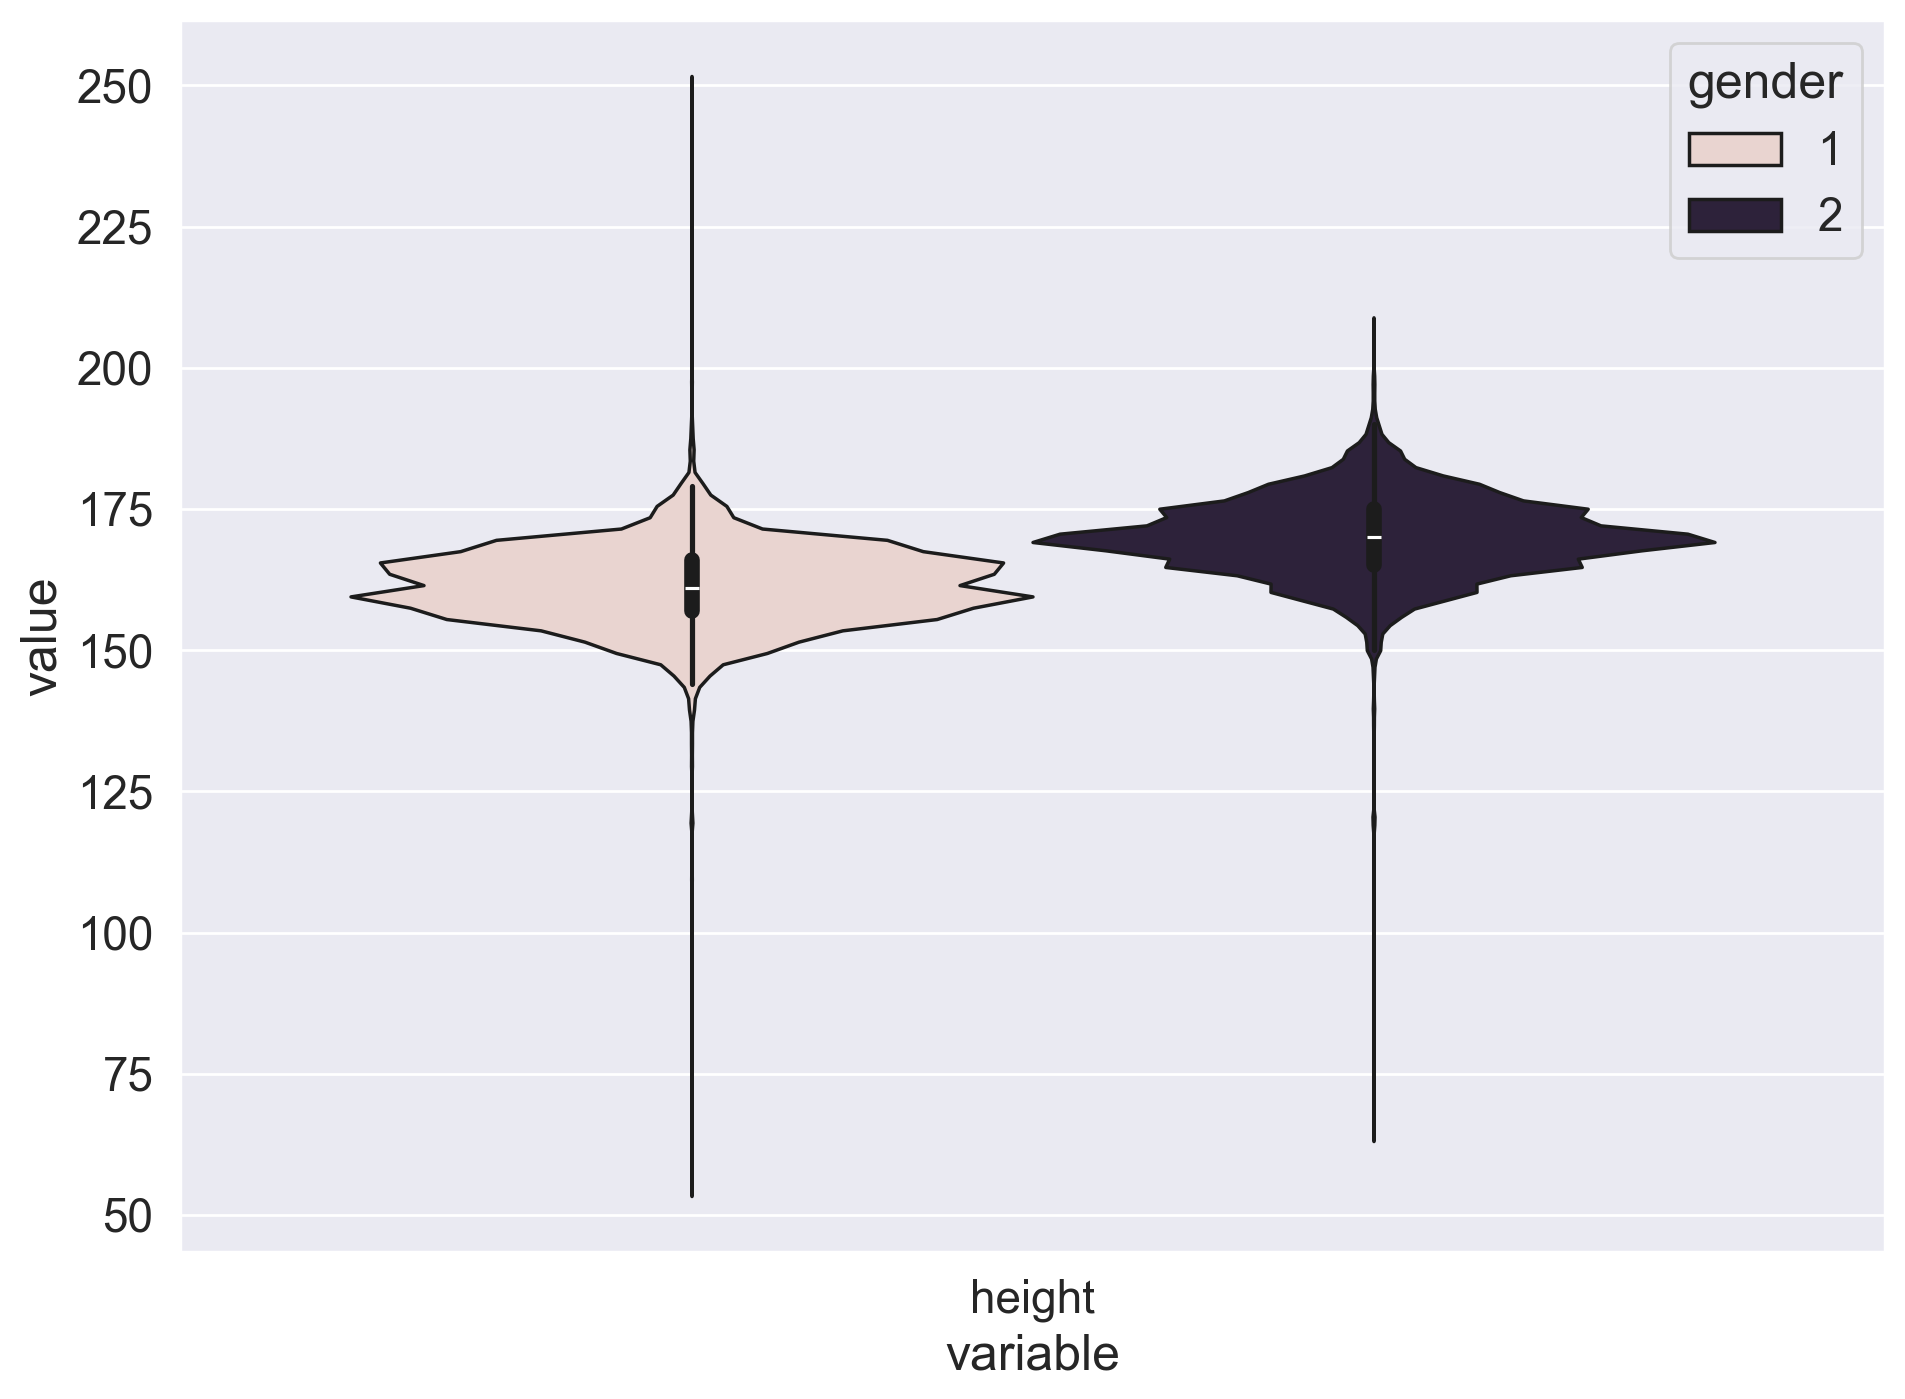

In [79]:
#2.2
df_melt = pd.melt(frame=df,value_vars = ["height"],id_vars = ["gender"])

ax = sns.violinplot(x="variable",y="value",hue="gender",scale="count",data=df_melt)


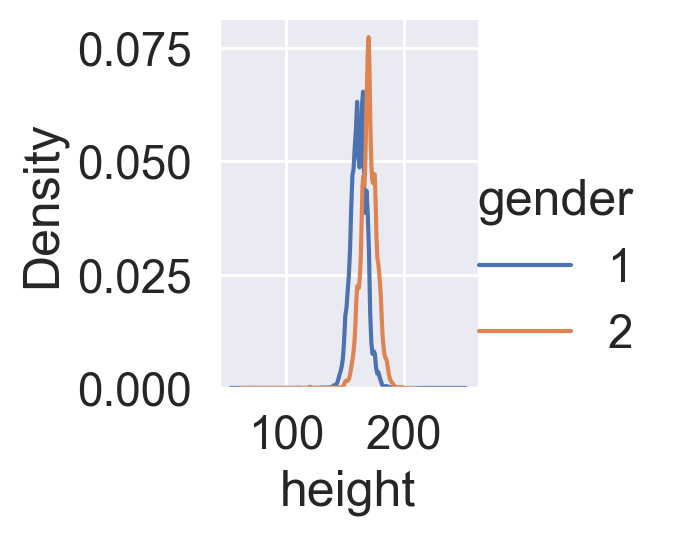

In [80]:
sns.FacetGrid(df, hue="gender").map(sns.kdeplot, "height").add_legend();

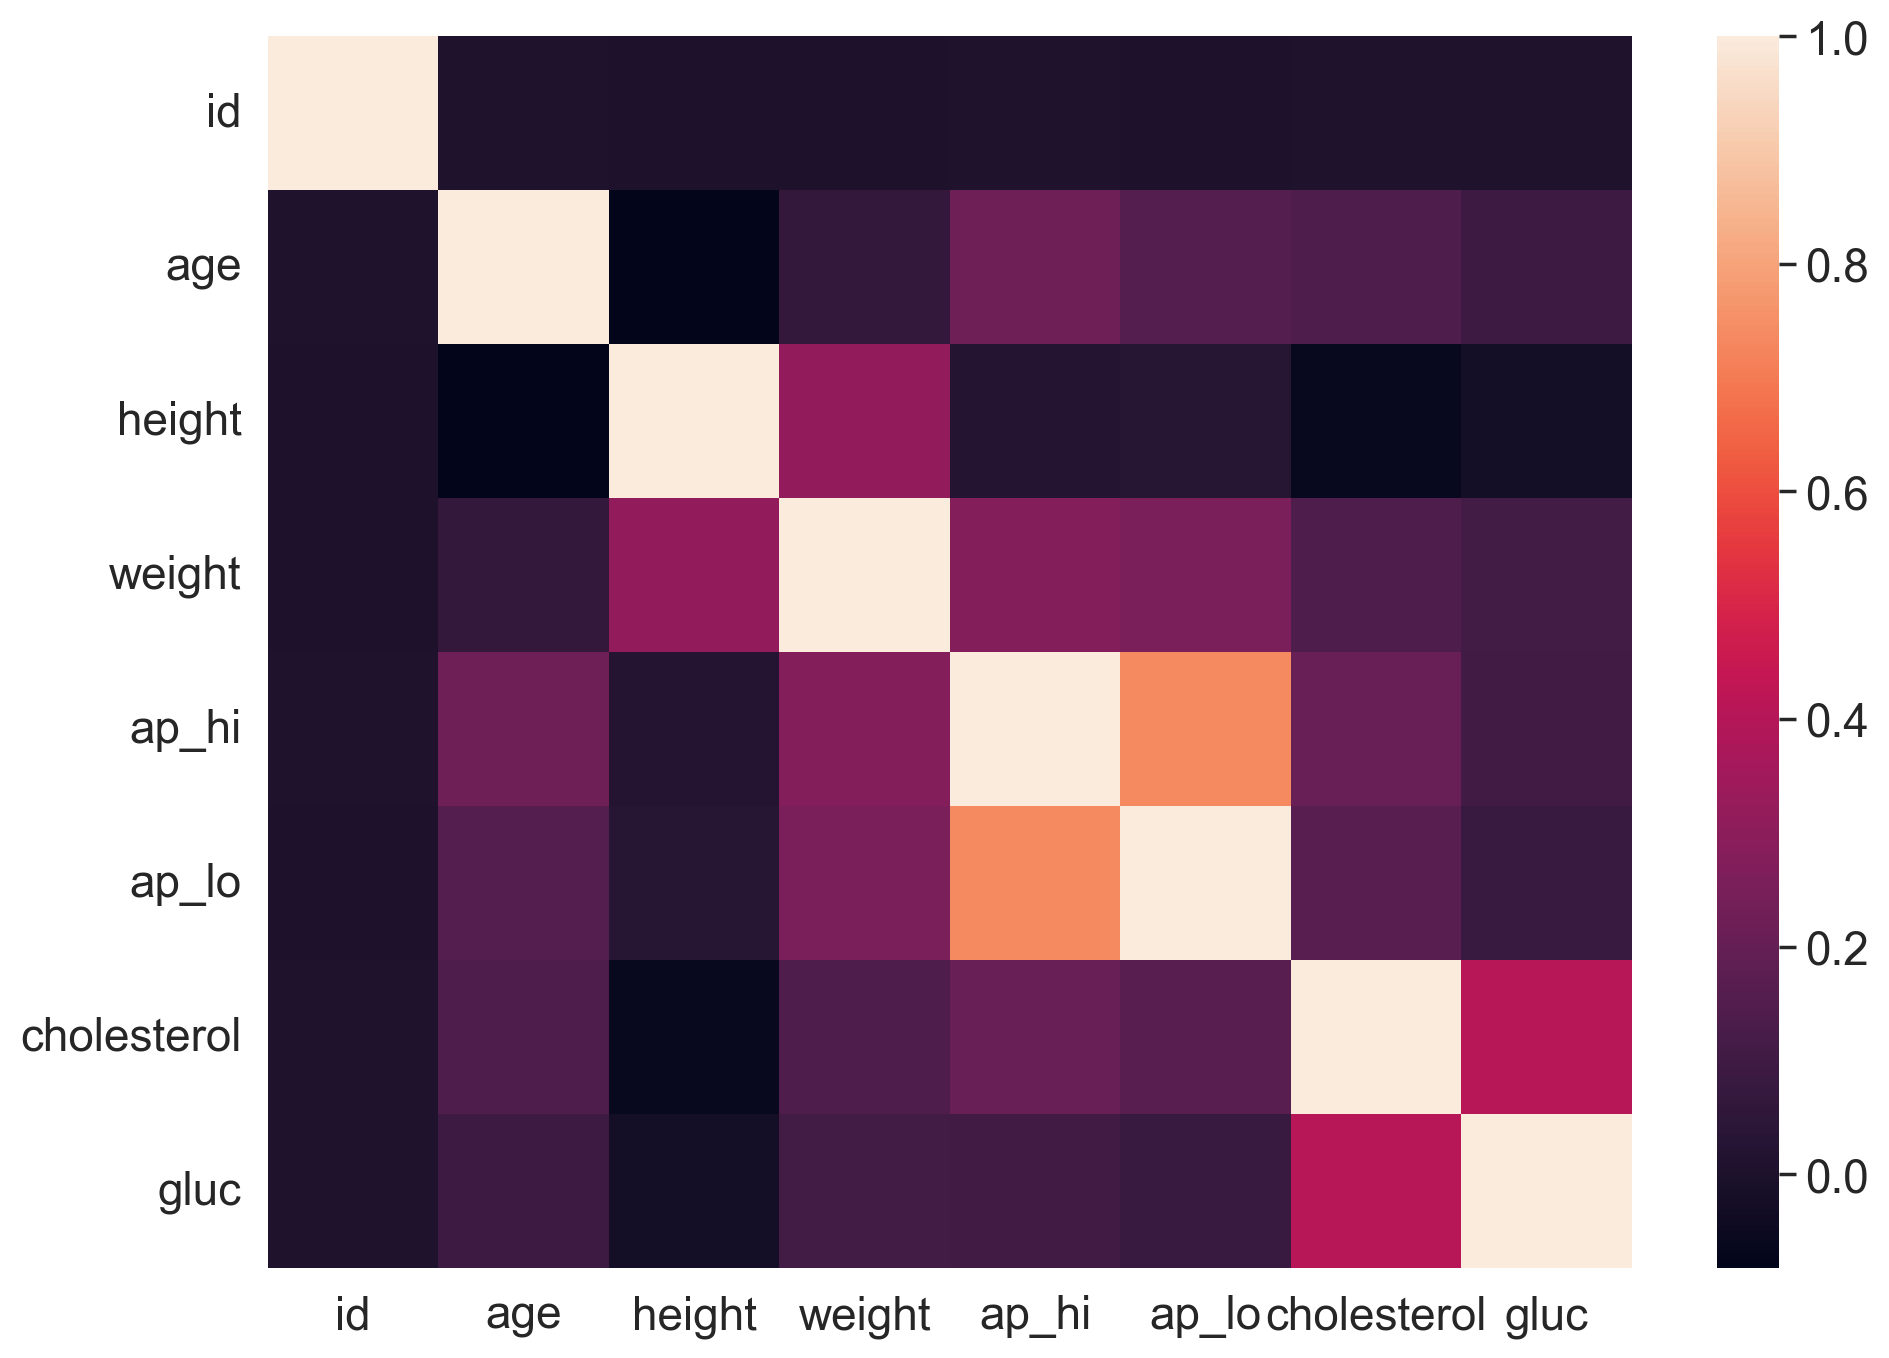

In [82]:
#2.3
# Calculate the correlation matrix
# corr = df[
#     ["id", "age", "height", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc"]
# ].corr(method="spearman")

# # Create a mask to hide the upper triangle of the correlation matrix (which is symmetric)
# mask = np.zeros_like(corr, dtype=np.bool_)
# mask[np.triu_indices_from(mask)] = True

# f, ax = plt.subplots(figsize=(12, 10))

# # Plot the heatmap using the mask and correct aspect ratio
# sns.heatmap(
#     corr,
#     mask=mask,
#     vmax=1,
#     center=0,
#     annot=True,
#     fmt=".2f",
#     square=True,
#     linewidths=0.5,
#     cbar_kws={"shrink": 0.5},
# 

corr = df[["id", "age", "height", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc"]].corr(method="spearman")
ax = sns.heatmap(corr)

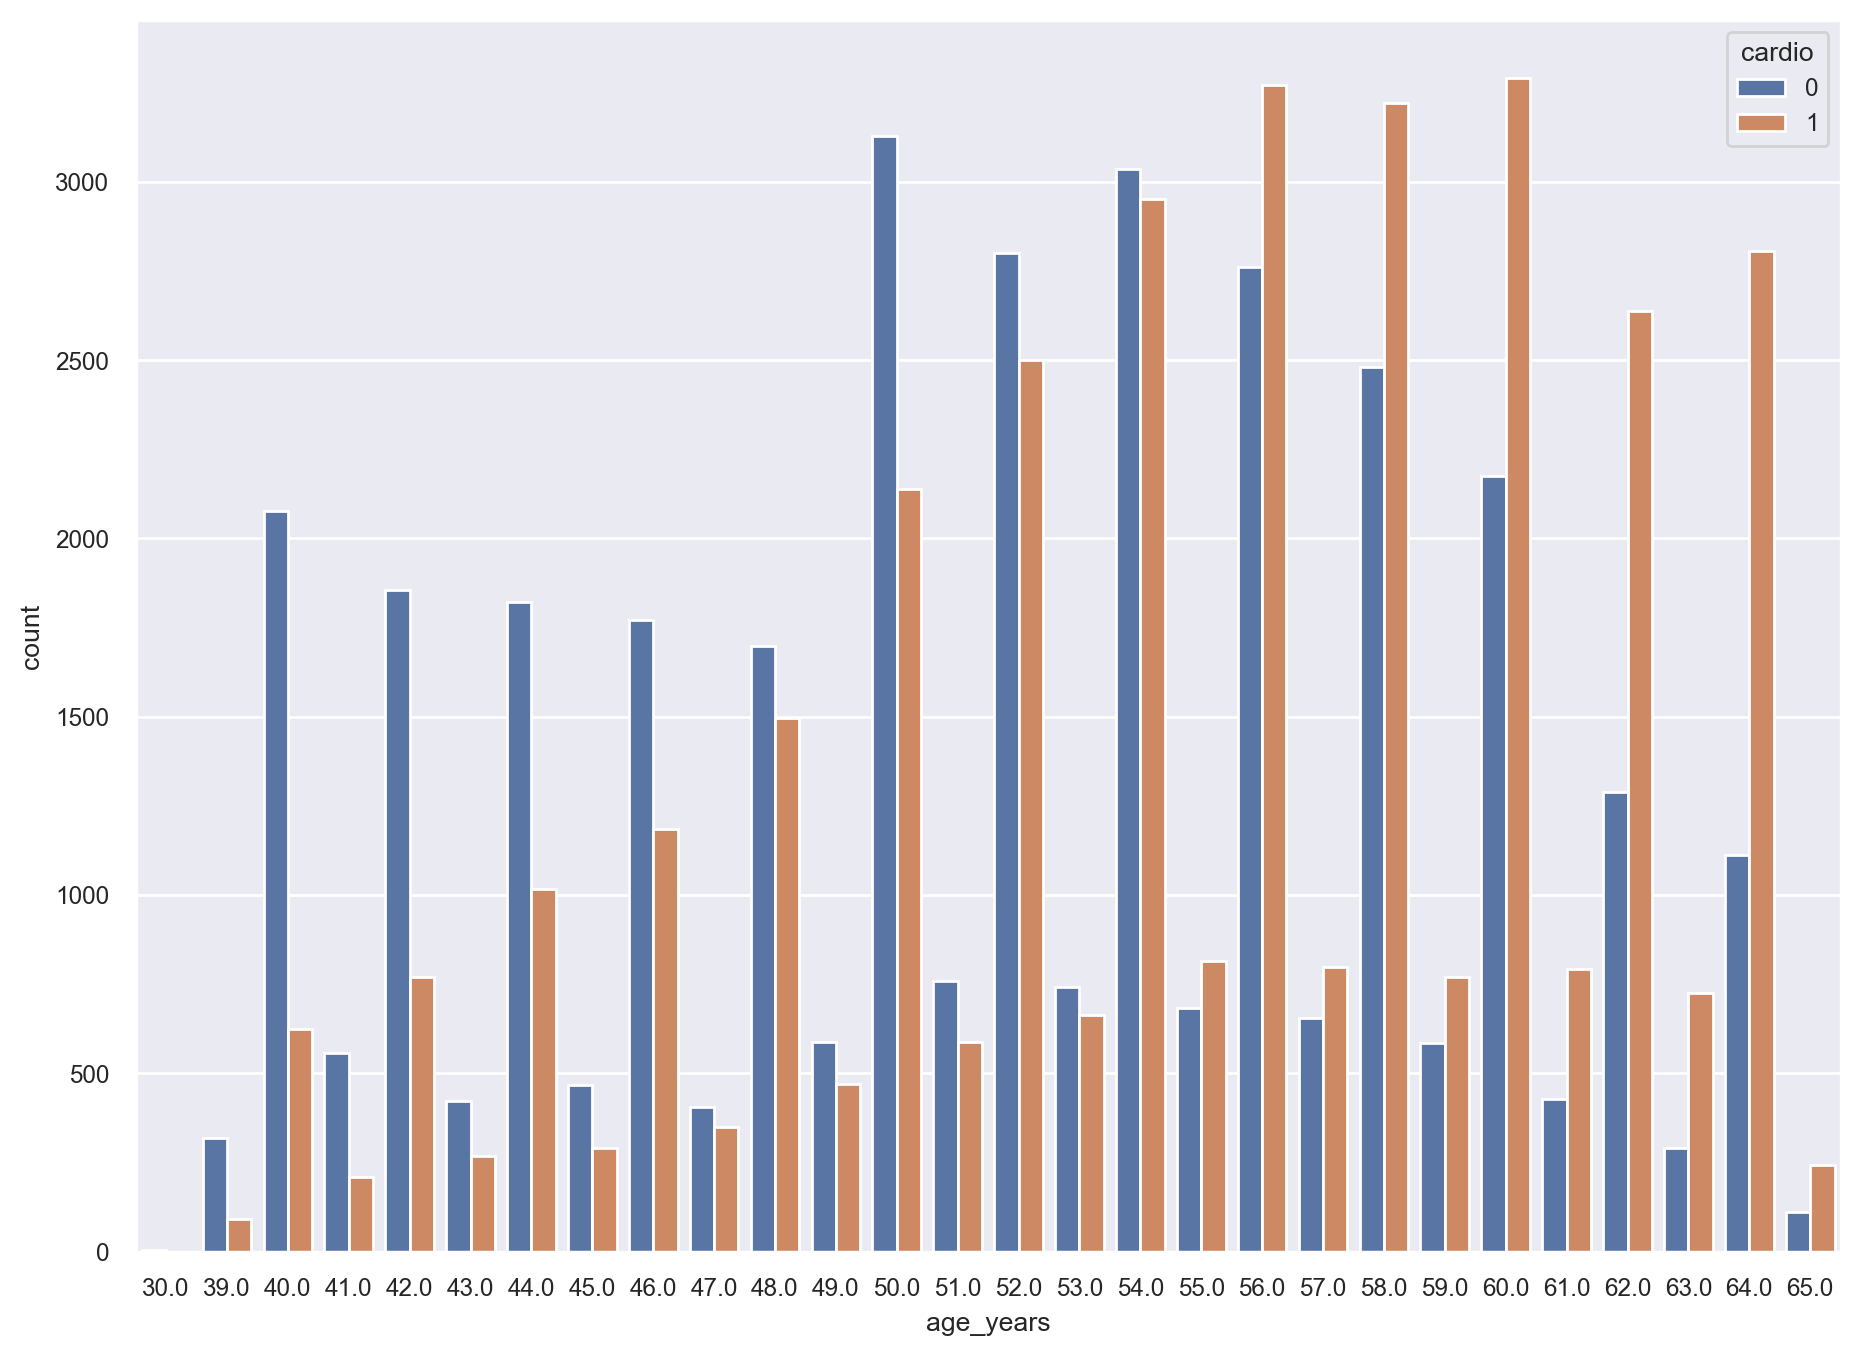

In [85]:
sns.countplot(x="age_years",hue="cardio",data=df)
sns.set(font_scale=0.2)